# Problem Statement

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

# Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv('C:/Users/AKHIL MOHANDAS/Documents/Project 2/austo_automobile+%282%29+%281%29.csv')

 View the top 5 records

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


 View the bottom 5 records

In [4]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


Shape of the dataframe

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1581 
no. of columns:  14


list of fields along with their data type:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


Statistical summary of data:

In [7]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


Age and number of dependents exhibit a relatively normal distribution, with mean values close to the median values.

In [8]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

missing values found in Gender and Partner salary

##### Observation:

Data has been loaded correctly into the pandas dataframe 

There are 1581 rows and 14 features

There are missing values in 'Partner_salary' and 'Gender' columns

### Data Pre-processing

#### Treat Missing and Bad Data

In [9]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

So we found some incorrectly spelled Gender options and missing values inside Gender column.

In [10]:
#replacing the incorrect spelled values with the correct ones
df['Gender'] = df['Gender'].replace(['Femal', 'Femle'], 'Female')

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

Now there are missing values (nan)

In [12]:
df['Gender'].value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [13]:
df['Gender'].isna().value_counts()

Gender
False    1528
True       53
Name: count, dtype: int64

The count of male is 1199 and Female is 329, while there are 329 missing values

As one gender category dominates the dataset, simple mode imputation may be appropriate

In [14]:
df['Gender'] = df['Gender'].replace(np.NAN, df['Gender'].mode()[0])

In [15]:
df['Gender'].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

Total salary is supposed to be the sum of salary and Partner salary

So we can correct data under the Partner_salary column using the formula : 'Total_salary' - 'Salary'

In [16]:
df['Partner_salary'].isnull().value_counts()

Partner_salary
False    1475
True      106
Name: count, dtype: int64

In [17]:
df['Partner_salary'] = df.apply(lambda row: row['Total_salary'] - row['Salary'], axis=1)

In [18]:
df['Partner_salary'].isnull().value_counts()

Partner_salary
False    1581
Name: count, dtype: int64

All Null values have been removed.

In [19]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

Univariate Analysis:

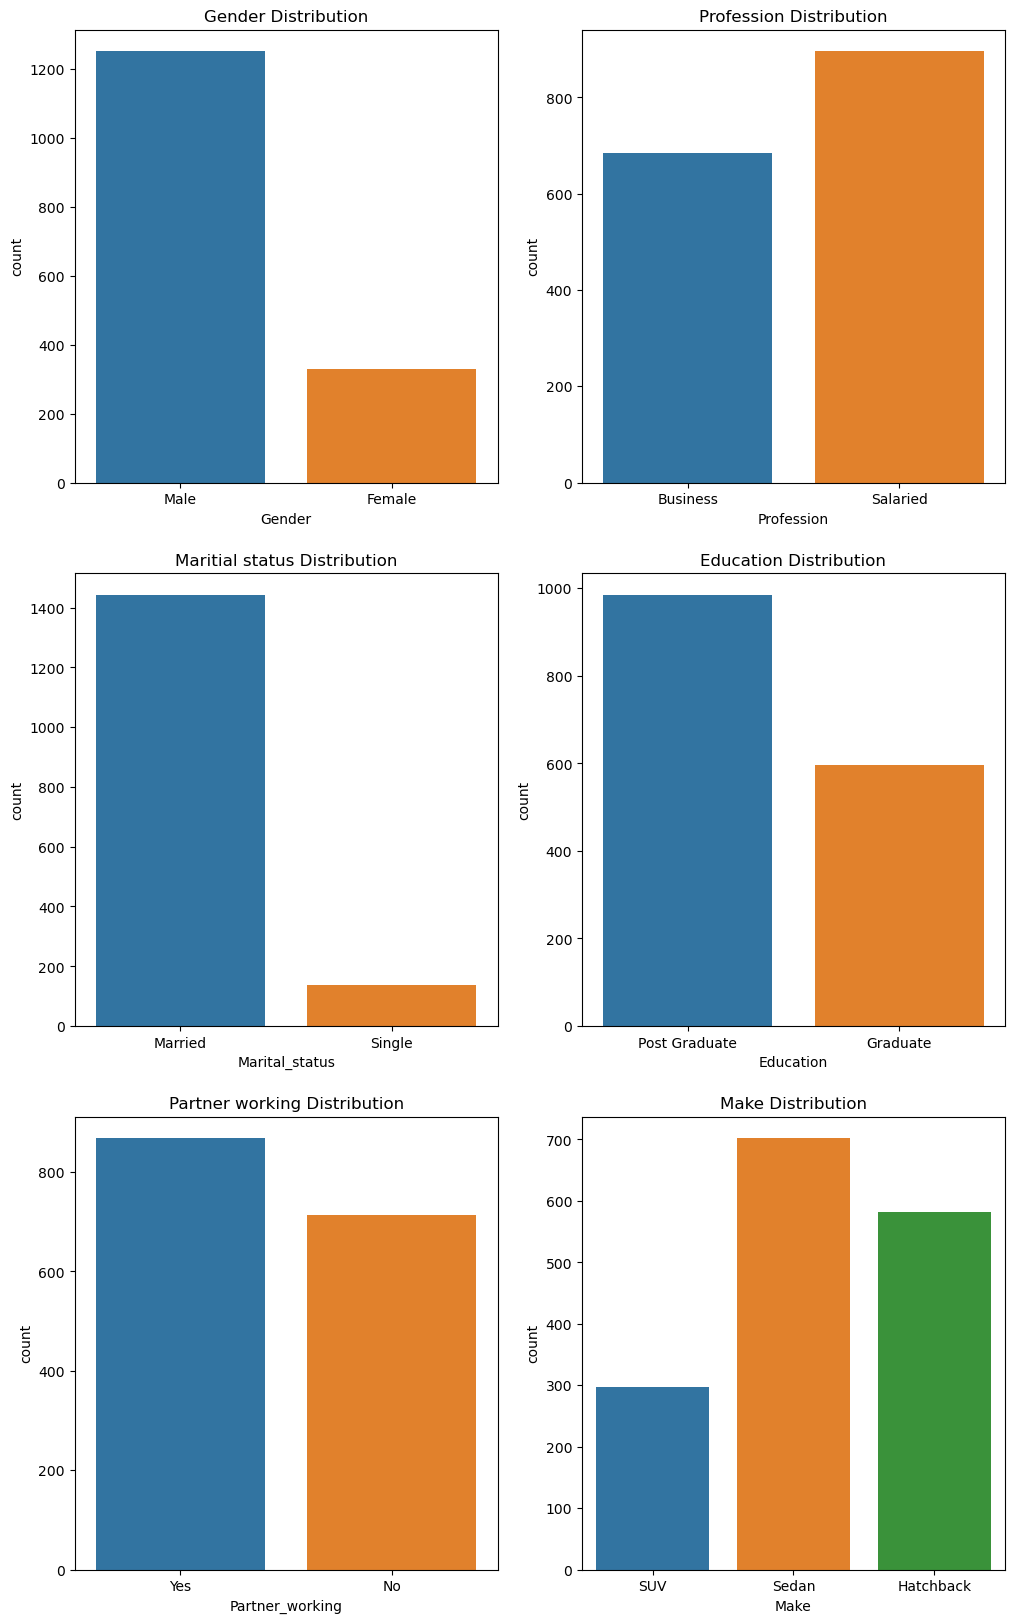

In [20]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,20)

axes[0, 0].set_title('Gender Distribution')
axes[0, 1].set_title('Profession Distribution')
axes[1, 0].set_title('Maritial status Distribution')
axes[1, 1].set_title('Education Distribution')
axes[2, 0].set_title('Partner working Distribution')
axes[2, 1].set_title('Make Distribution')


sns.countplot(x='Gender', data=df,ax=axes[0][0])
sns.countplot(x='Profession', data=df,ax=axes[0][1])
sns.countplot(x='Marital_status', data=df,ax=axes[1][0])
sns.countplot(x='Education', data=df,ax=axes[1][1])
sns.countplot(x='Partner_working', data=df,ax=axes[2][0])
sns.countplot(x='Make', data=df,ax=axes[2][1])


plt.show()

In [21]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.791904
Female    0.208096
Name: proportion, dtype: float64

Dataset contains a higher proportion of males (approximately 79.19%) compared to females (approximately 20.81%)

There are more Male customers as comapared to Female.

In [22]:
pd.crosstab(df['Profession'], df['Partner_working'], margins=True, normalize = False)

Partner_working,No,Yes,All
Profession,,,
Business,304,381,685
Salaried,409,487,896
All,713,868,1581


Approximately 56.67% of customers in the dataset are categorized as "Salaried," while about 43.33% are categorized as "Business."

This suggests that there is a higher proportion of customers with salaried professions compared to those in business professions.

Approximately 55% of customers in the dataset has a working partner," while about 45% have a non- working partner.

This suggests that there is a higher proportion of customers with partner working.

higher proportion of individuals in both "Business" and "Salaried" professions have working partners compared to those who do not.

In [23]:
pd.crosstab(df['Education'], df['Marital_status'], margins=True, normalize = False)

Marital_status,Married,Single,All
Education,,,
Graduate,551,45,596
Post Graduate,892,93,985
All,1443,138,1581


The majority of individuals in the dataset have a Post Graduate education level, indicating that a significant portion of the customers are highly educated.

There is a notable imbalance in marital status, with a much larger proportion of individuals being married compared to those who are single. Number of single customers are very low as compared ot Married customers.

Higher proportion of individuals with both Graduate and Post Graduate education levels are married compared to those who are single.

In [24]:
df['Make'].value_counts(normalize=True)

Make
Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: proportion, dtype: float64

Sedans are the most sold type of automobile, followed by Hatchbacks and SUVs.

Sedans and Hatchbacks are more prevalent compared to SUVs among the automobiles

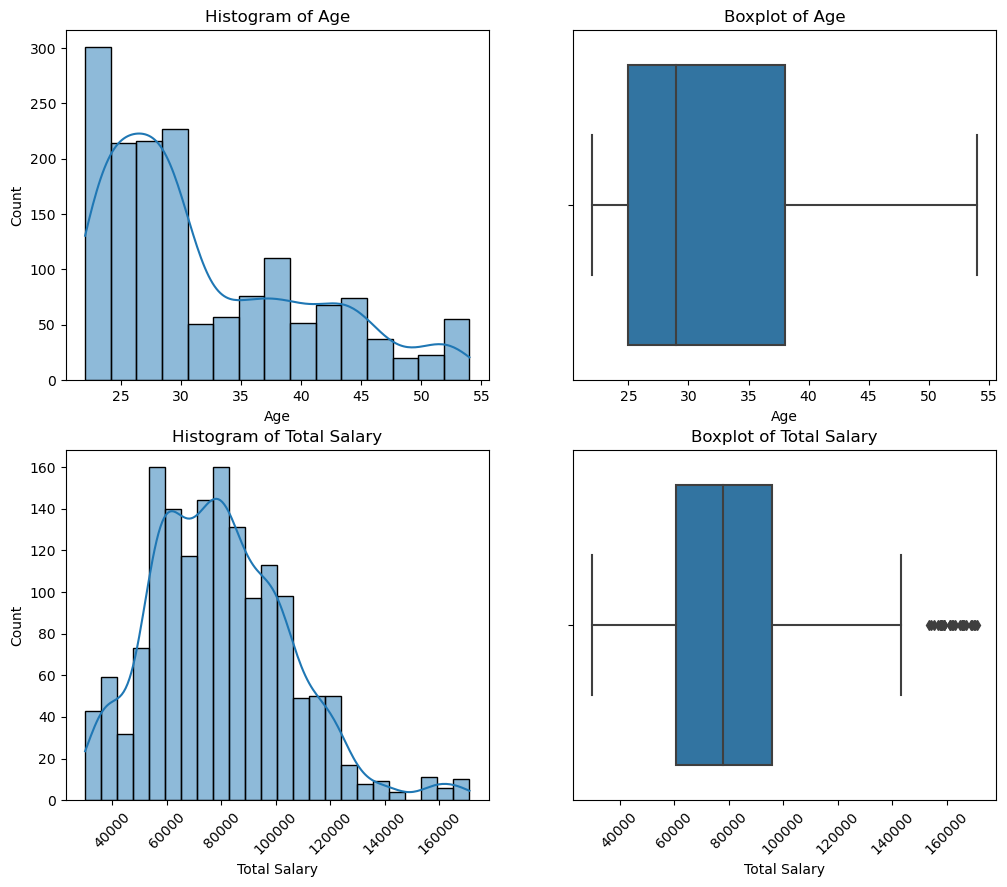

In [25]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)

axes[0, 0].set_title('Histogram of Age')
axes[0, 1].set_title('Boxplot of Age')
axes[1, 0].set_title('Histogram of Total Salary')
axes[1, 1].set_title('Boxplot of Total Salary')


sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Total_salary'] , kde=True, ax=axes[1][0])

axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Total_salary', data=df , ax=axes[1][1])

axes[1][0].set_xlabel('Total Salary')
axes[1][1].set_xlabel('Total Salary')

plt.show()

In [26]:
df.Age.describe().T

count    1581.000000
mean       31.922201
std         8.425978
min        22.000000
25%        25.000000
50%        29.000000
75%        38.000000
max        54.000000
Name: Age, dtype: float64

#### Insights:

Found Outliers for 'Total_salary'.

We found that there are no outliers for the AGE of the customers, the age ranges between 22 and 54 with the average age being 32. It has a right skewed distribution which means the most number of customers are inbetween the age of 29-54

#### Outlier Treatment

In [27]:
df.Total_salary.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

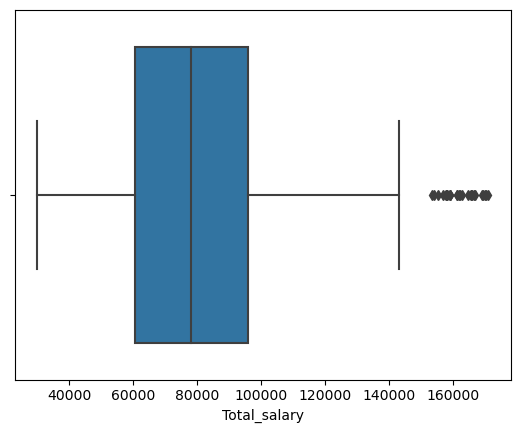

In [28]:
sns.boxplot(x=df.Total_salary);

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
lr,ur=remove_outlier(df['Total_salary'])
print("lower range",lr, "and upper range", ur)

lower range 7400.0 and upper range 149000.0


In [31]:
df['Total_salary']=np.where(df['Total_salary']>ur,ur,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr,lr,df['Total_salary'])

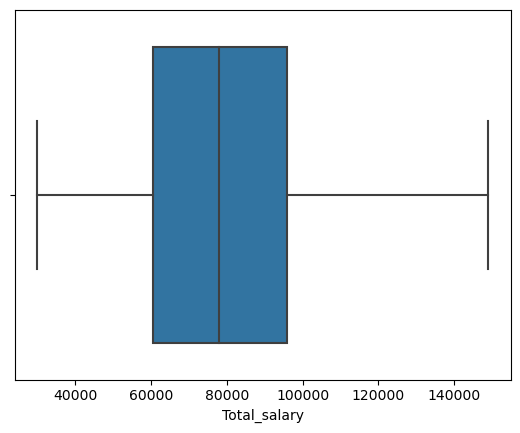

In [32]:
sns.boxplot(x=df.Total_salary);

In [33]:
df.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

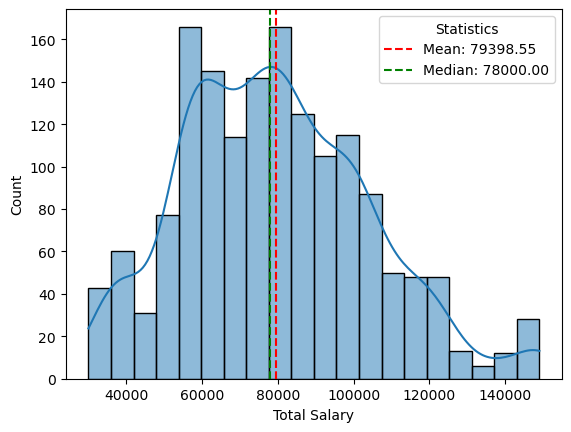

In [34]:
sns.histplot(df['Total_salary'] , kde=True)

plt.xlabel("Total Salary")

mean_salary = df['Total_salary'].mean()
median_salary = df['Total_salary'].median()

plt.axvline(mean_salary, color='red', linestyle='--', label=f'Mean: {mean_salary:.2f}')
plt.axvline(median_salary, color='green', linestyle='--', label=f'Median: {median_salary:.2f}')

plt.legend(title='Statistics')

plt.show()

#### Insights:

The mean and median are relatively close to each other, suggesting that the distribution is close to symmetric.

The values are spread out around the mean.


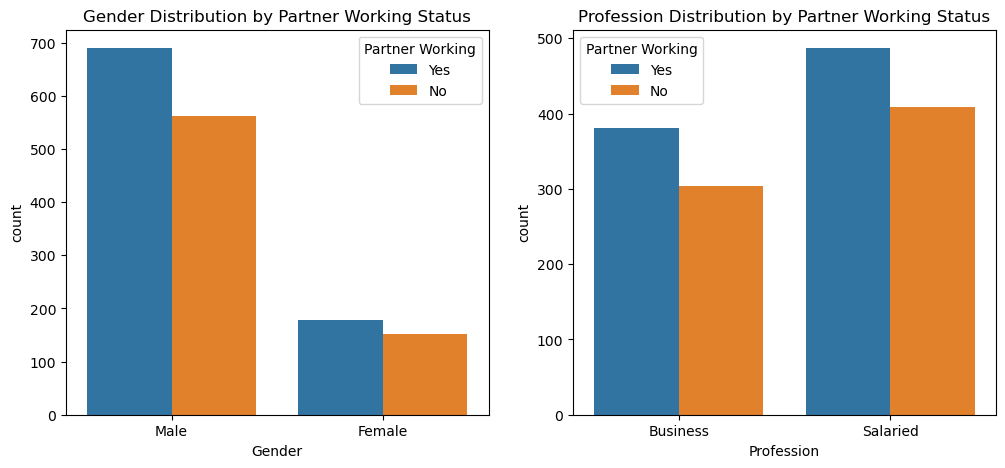

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12,5)

axes[0].set_title('Gender Distribution by Partner Working Status')
axes[1].set_title('Profession Distribution by Partner Working Status')

sns.countplot(x='Gender', hue='Partner_working', data=df, ax=axes[0])
sns.countplot(x='Profession', hue='Partner_working', data=df, ax=axes[1])

axes[0].legend(title='Partner Working', loc='upper right')
axes[1].legend(title='Partner Working', loc='upper left')

plt.show()

In [36]:
pd.crosstab(df['Gender'], df['Partner_working'], margins=True, normalize = False)

Partner_working,No,Yes,All
Gender,,,
Female,151,178,329
Male,562,690,1252
All,713,868,1581


In [37]:
pd.crosstab(df['Profession'], df['Partner_working'], margins=True, normalize = False)

Partner_working,No,Yes,All
Profession,,,
Business,304,381,685
Salaried,409,487,896
All,713,868,1581


Substantial number of Customers are having working partner.

Both Male and Female customers have a similar distribution in terms of partner working status.

Both business professionals and salaried individuals have a similar distribution in terms of partner working status.

Around half of the customers in each profession have a partner who is employed.

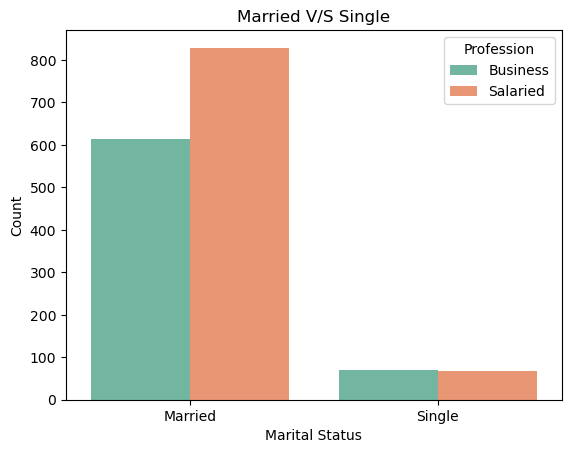

In [38]:
plt.title('Married V/S Single')
sns.countplot(data=df, x='Marital_status', palette='Set2', hue='Profession')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [39]:
pd.crosstab(df['Marital_status'], df['Profession'], margins=True, normalize = False)

Profession,Business,Salaried,All
Marital_status,,,
Married,614,829,1443
Single,71,67,138
All,685,896,1581


#### Insights:

91% of the customers are married.

Married customers are mostly salaried while Single customers are business professionals.

Difference in ratio between business and salaried people is more pronounced when it comes to married population.

Treating Outliers in Subcateogaries:

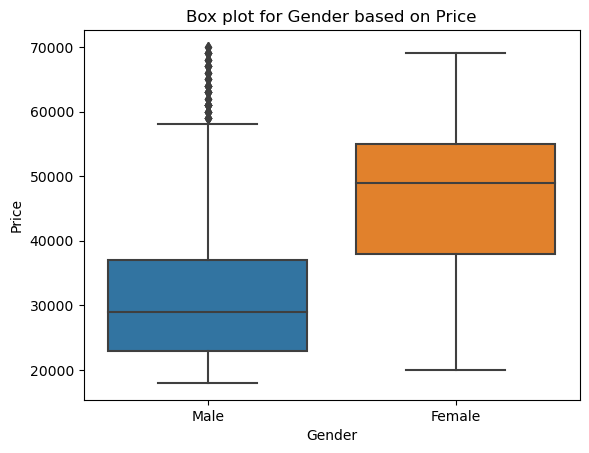

In [40]:
fig_dims = (12, 5)
plt.title('Box plot for Gender based on Price')
plt.xlabel('Make of Car')
plt.ylabel('Price')
sns.boxplot(x='Gender' ,y='Price', data=df);

In [41]:
df.groupby('Gender')['Price'].describe().T

Gender,Female,Male
count,329.000000,1252.000000
mean,47705.167173,32416.134185
std,11244.836378,12366.253107
min,20000.000000,18000.000000
25%,38000.000000,23000.000000
50%,49000.000000,29000.000000
75%,55000.000000,37000.000000
max,69000.000000,70000.000000


In [42]:
male_data = df[df['Gender'] == 'Male']
male_prices = male_data['Price']

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur=remove_outlier(male_prices)
print("lower range",lr, "and upper range", ur)

male_prices_clipped = np.where(male_prices < lr, lr, male_prices)
male_prices_clipped = np.where(male_prices > ur, ur, male_prices_clipped)

df.loc[df['Gender'] == 'Male', 'Price'] = male_prices_clipped

lower range 2000.0 and upper range 58000.0


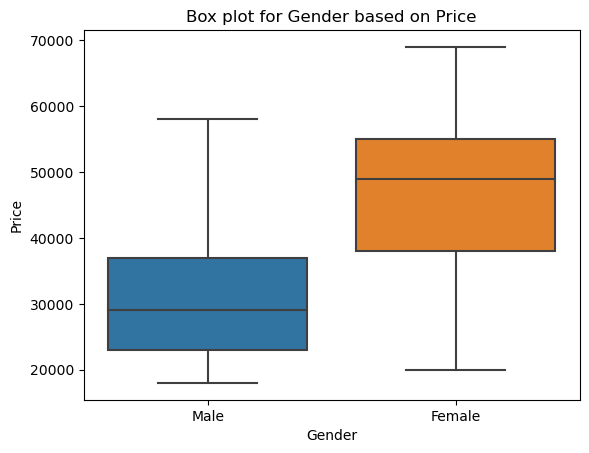

In [43]:
fig_dims = (12, 5)
plt.title('Box plot for Gender based on Price')
plt.xlabel('Gender')
plt.ylabel('Price')
sns.boxplot(x='Gender' ,y='Price', data=df);

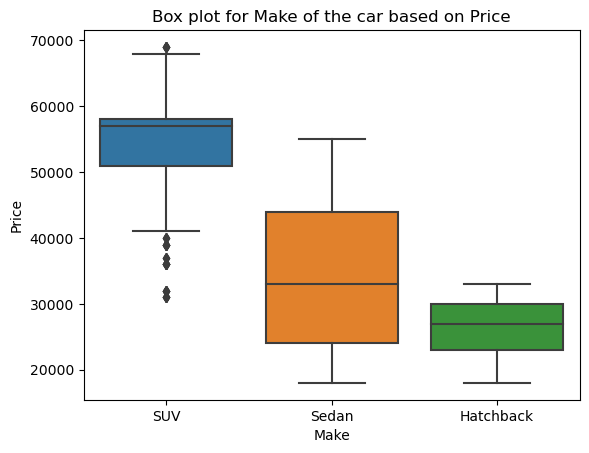

In [44]:
fig_dims = (12, 5)
plt.title('Box plot for Make of the car based on Price')
plt.xlabel('Make of Car')
plt.ylabel('Price')
sns.boxplot(x='Make', y='Price', data=df);

In [45]:
df.groupby('Make')['Price'].describe().T

Make,Hatchback,SUV,Sedan
count,582.000000,297.000000,702.000000
mean,26474.226804,54542.087542,34603.988604
std,4290.467640,8232.213403,11152.164304
min,18000.000000,31000.000000,18000.000000
25%,23000.000000,51000.000000,24000.000000
50%,27000.000000,57000.000000,33000.000000
75%,30000.000000,58000.000000,44000.000000
max,33000.000000,69000.000000,55000.000000


Found Outliers for SUV make, need to treat this outlier

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [47]:
suv_data = df[df['Make'] == 'SUV']
suv_prices = suv_data['Price']

In [48]:
lr,ur=remove_outlier(suv_prices)
print("lower range",lr, "and upper range", ur)

lower range 40500.0 and upper range 68500.0


In [49]:
suv_prices_clipped = np.where(suv_prices < lr, lr, suv_prices)
suv_prices_clipped = np.where(suv_prices > ur, ur, suv_prices_clipped)

In [50]:
df.loc[df['Make'] == 'SUV', 'Price'] = suv_prices_clipped

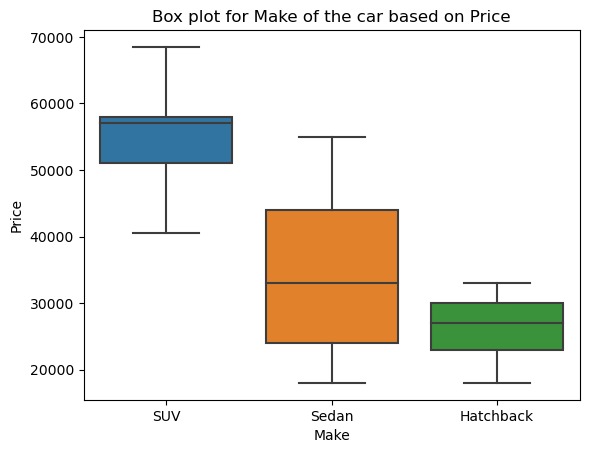

In [51]:
fig_dims = (12, 5)
plt.title('Box plot for Make of the car based on Price')
plt.xlabel('Make of Car')
plt.ylabel('Price')
sns.boxplot(x='Make', y='Price', data=df);

In [52]:
df.groupby('Make')['Price'].describe().T

Make,Hatchback,SUV,Sedan
count,582.000000,297.000000,702.000000
mean,26474.226804,55013.468013,34603.988604
std,4290.467640,7098.592868,11152.164304
min,18000.000000,40500.000000,18000.000000
25%,23000.000000,51000.000000,24000.000000
50%,27000.000000,57000.000000,33000.000000
75%,30000.000000,58000.000000,44000.000000
max,33000.000000,68500.000000,55000.000000


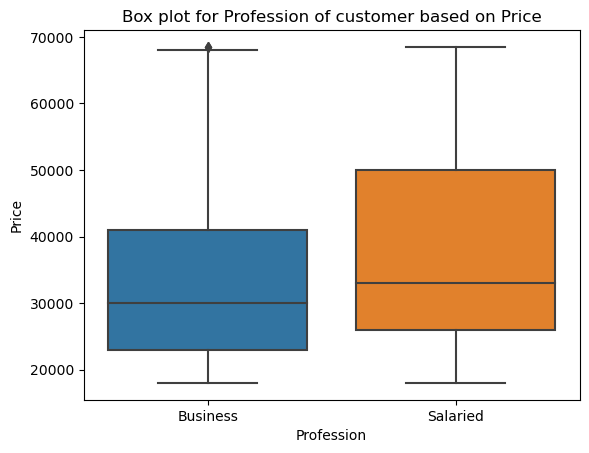

In [53]:
fig_dims = (12, 5)
plt.title('Box plot for Profession of customer based on Price')
plt.xlabel('Profession')
plt.ylabel('Price')
sns.boxplot(x='Profession', y='Price', data=df);

In [54]:
B_data = df[df['Profession'] == 'Business']
B_prices = B_data['Price']

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur=remove_outlier(B_prices)
print("lower range",lr, "and upper range", ur)

B_prices_clipped = np.where(B_prices < lr, lr, B_prices)
B_prices_clipped = np.where(B_prices > ur, ur, B_prices_clipped)

df.loc[df['Profession'] == 'Business', 'Price'] = B_prices_clipped

lower range -4000.0 and upper range 68000.0


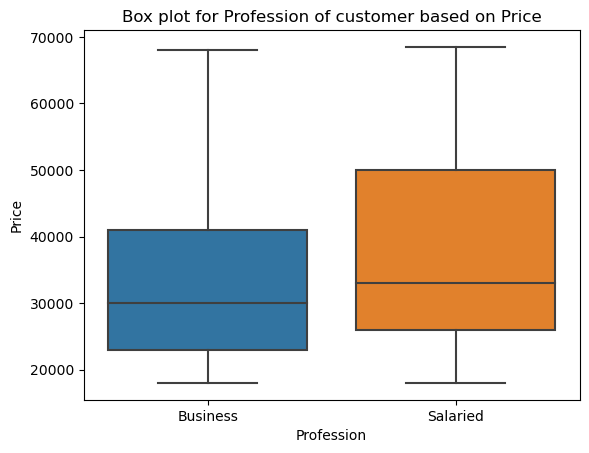

In [55]:
fig_dims = (12, 5)
plt.title('Box plot for Profession of customer based on Price')
plt.xlabel('Profession')
plt.ylabel('Price')
sns.boxplot(x='Profession', y='Price', data=df);

Bivariate:

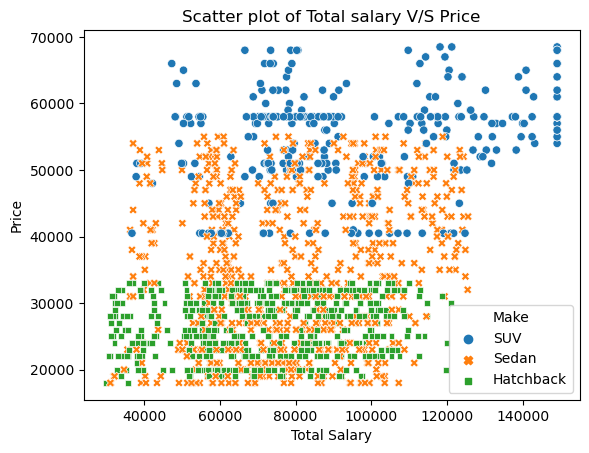

In [56]:
plt.title('Scatter plot of Total salary V/S Price')
plt.xlabel('Total Salary')
plt.ylabel('Price')
sns.scatterplot(data=df,x='Total_salary',y='Price',hue='Make',style='Make');

In [57]:
df.groupby('Make')['Price'].describe().T

Make,Hatchback,SUV,Sedan
count,582.000000,297.000000,702.000000
mean,26474.226804,55010.101010,34603.988604
std,4290.467640,7092.289708,11152.164304
min,18000.000000,40500.000000,18000.000000
25%,23000.000000,51000.000000,24000.000000
50%,27000.000000,57000.000000,33000.000000
75%,30000.000000,58000.000000,44000.000000
max,33000.000000,68500.000000,55000.000000


#### Insights:

Total salary and Price have a positive correlation.

SUVs have the highest average price among the three categories, followed by Sedans and then Hatchbacks.

The Sedan category shows the highest variability in prices.

The Sedan category has the highest number of customers, followed by Hatchback and then SUV.


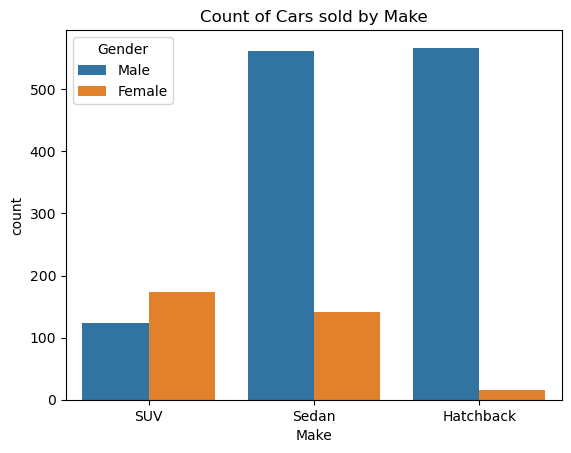

In [58]:
plt.title('Count of Cars sold by Make')
plt.xlabel('Make')
plt.ylabel('Count')
sns.countplot(data=df,x='Make',hue='Gender');

In [59]:
pd.crosstab(df['Make'], df['Gender'], margins=True, normalize = False)

Gender,Female,Male,All
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
All,329,1252,1581


#### Insights:

Among females, the preference seems to be towards SUVs.

Among males, the preference seems to be significantly towards Sedans, followed by Hatchbacks and then SUVs.

Males show a higher preference for cars compared to females, with a significantly larger number of males purchasing Sedans.

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


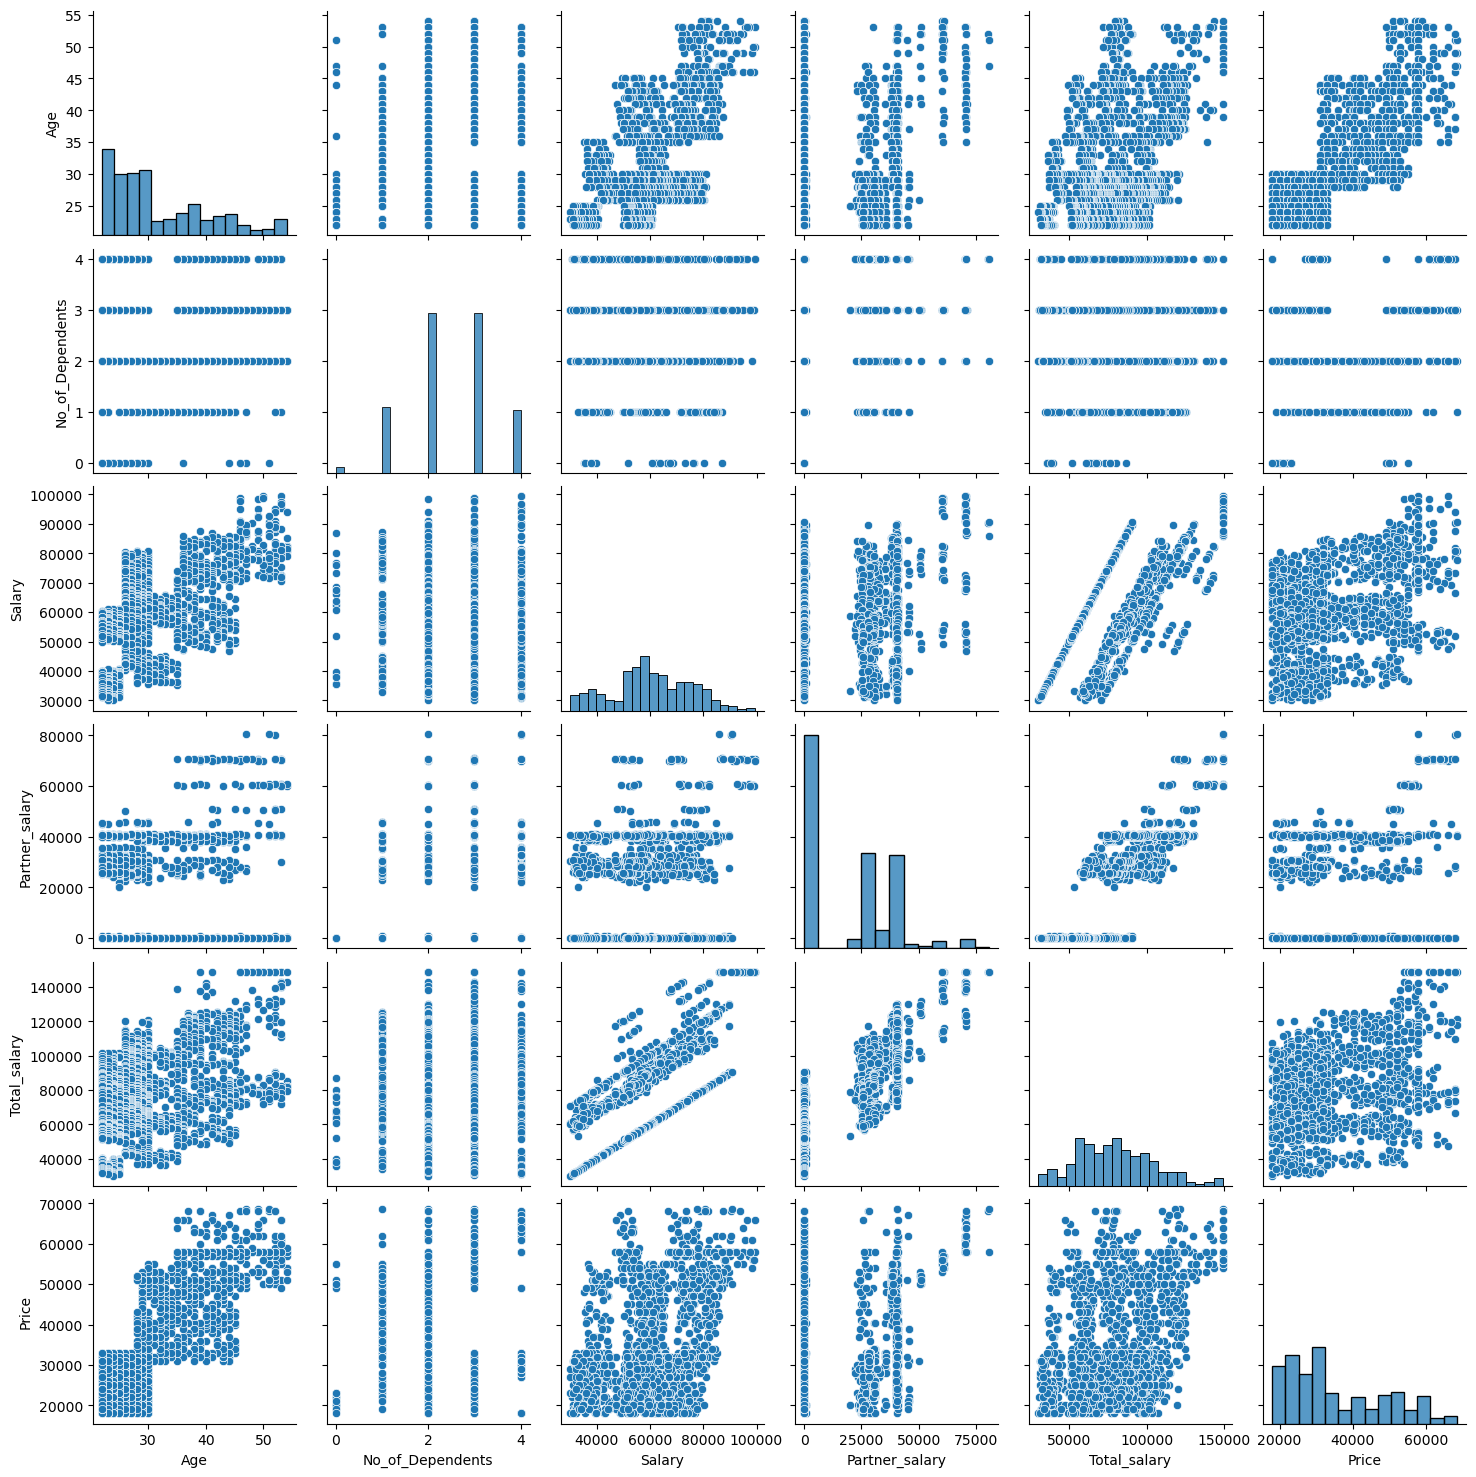

In [60]:
sns.pairplot(df);

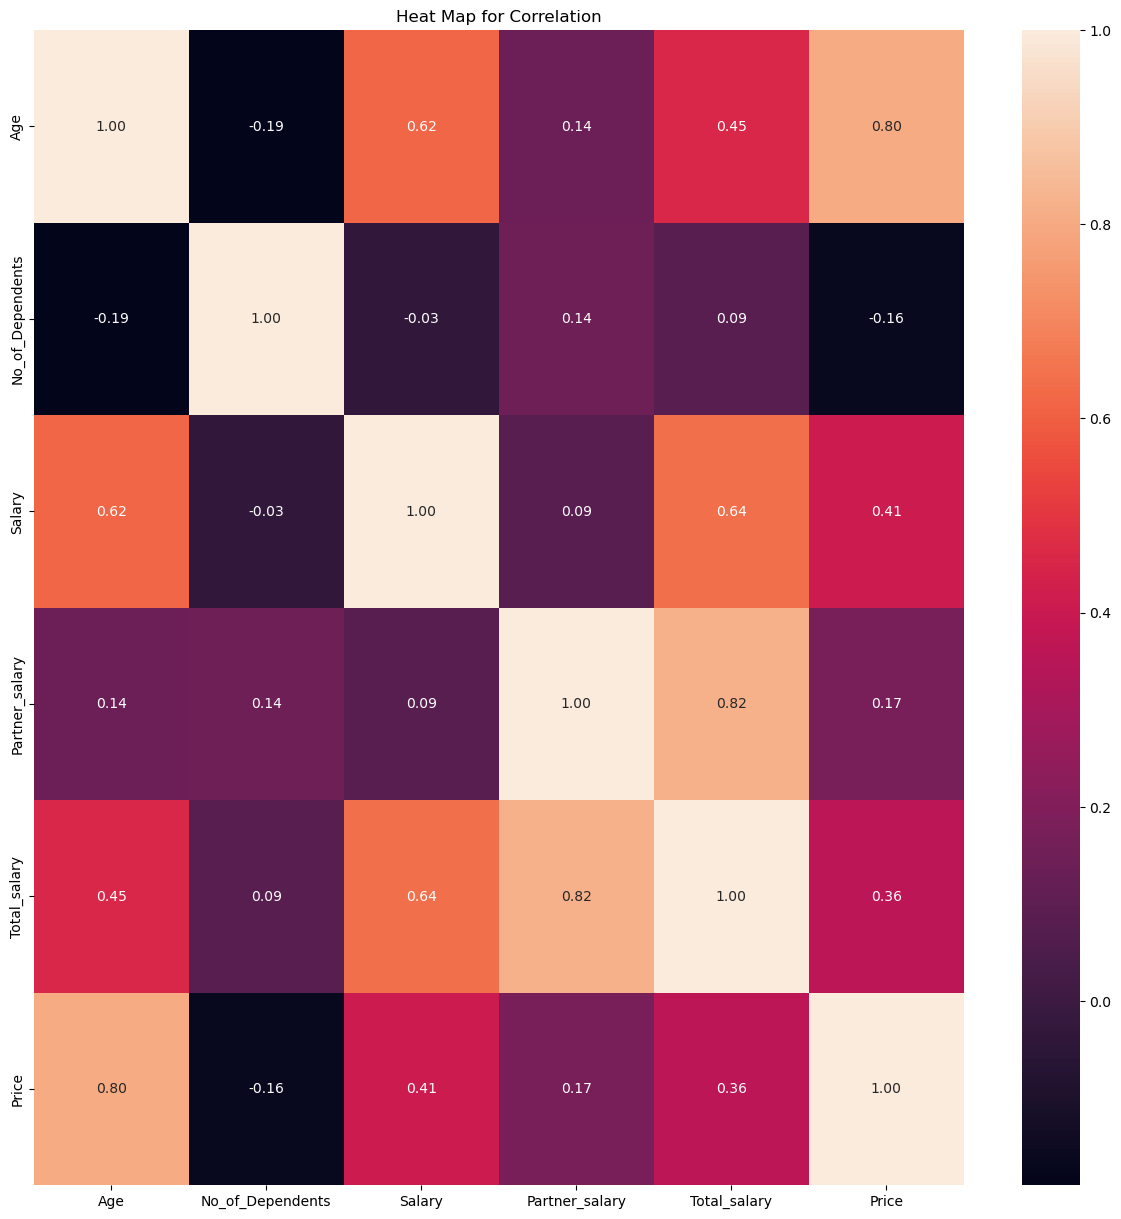

In [61]:
plt.figure(figsize=(15,15))
plt.title('Heat Map for Correlation')
sns.heatmap(df[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(),annot=True,fmt=".2f");

### Insights

There is a strong correlation observed between few fields. 'Total salary' is highly correlated to 'Partner salary' and 'Salary'.
'Age' is highly correlated to 'Price' and "Salary"


'Price' and 'Salary' and 'Age' has a negative correlation with 'Number of dependants'.


### Questions:


1. Do men tend to prefer SUVs more compared to women?

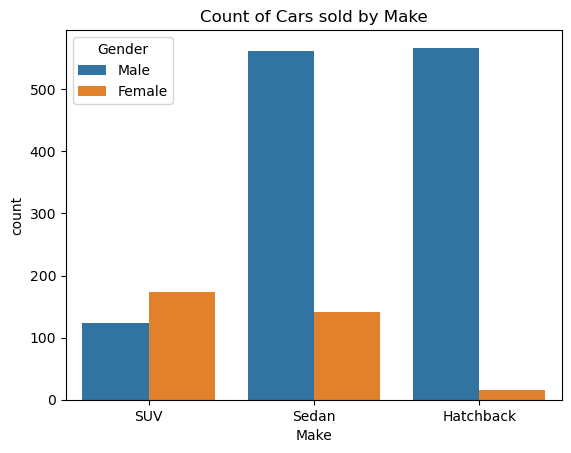

In [62]:
plt.title('Count of Cars sold by Make')
plt.xlabel('Make')
plt.ylabel('Count')
sns.countplot(data=df,x='Make',hue='Gender');

In [63]:
pd.crosstab(df['Make'], df['Gender'], margins=True, normalize = False)

Gender,Female,Male,All
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
All,329,1252,1581


It appears that females prefer to buy SUVs more than males.

There is a significant difference in the proportion of SUV purchases between men and women.

Male customers prefer Sedan and Hatchback compared to SUVs.

2. What is the likelihood of a salaried person buying a Sedan?

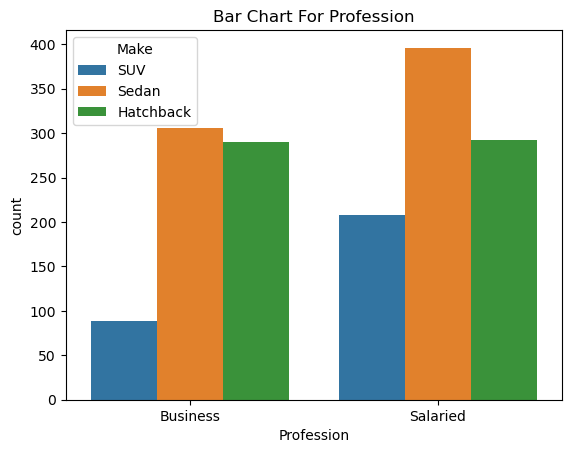

In [64]:
plt.title('Bar Chart For Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
sns.countplot(data=df,x='Profession',hue='Make');

In [65]:
pd.crosstab(df['Profession'], df['Make'],margins=True, normalize = False)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,290,89,306,685
Salaried,292,208,396,896
All,582,297,702,1581


we need to calculate the proportion of Sedan purchases among the Salaried profession.

Number of Sedan purchases: 396
Total purchases: 896

Probability of buying a Sedan= (Total purchases/Number of Sedan purchases) ×100

Approximately 44.2% of salaried individuals opt to purchase a Sedan, indicating a significant preference for this vehicle category among this demographic.

 

3.What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [66]:
d_male=df[df['Gender']=='Male']

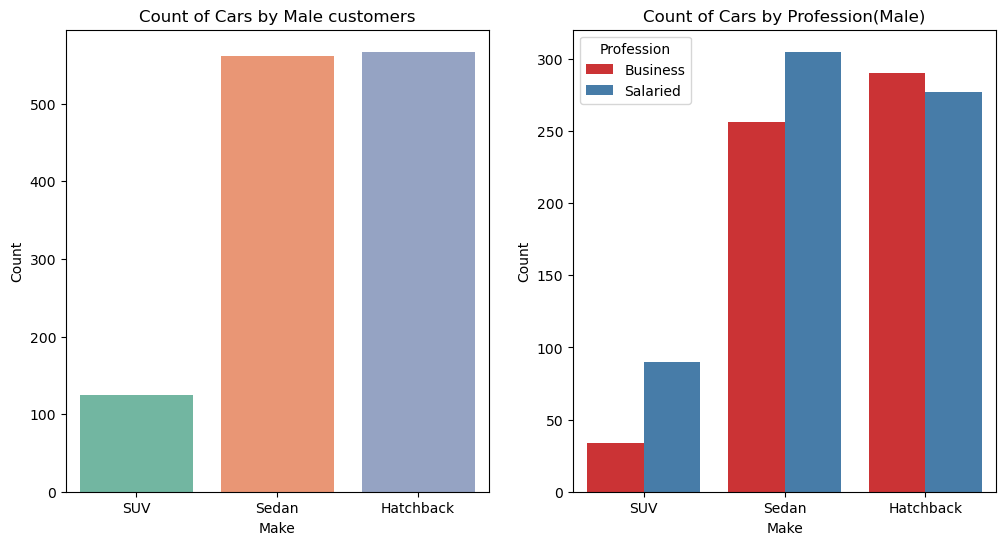

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

sns.countplot(data=d_male, x='Make', palette='Set2', ax=axes[0])
axes[0].set_title('Count of Cars by Male customers')
axes[0].set_xlabel('Make')
axes[0].set_ylabel('Count')

sns.countplot(data=d_male, x='Make', hue='Profession', palette='Set1', ax=axes[1])
axes[1].set_title('Count of Cars by Profession(Male)')
axes[1].set_xlabel('Make')
axes[1].set_ylabel('Count')

plt.show()

In [68]:
pd.crosstab(d_male['Profession'], d_male['Make'], margins=True, normalize = False)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,290,34,256,580
Salaried,277,90,305,672
All,567,124,561,1252


When the male customer is 'Salaried' by profession he prefers to buy SUVs, which supports sheldon coopers's claim.

4. How does the the amount spent on purchasing automobiles vary by gender?

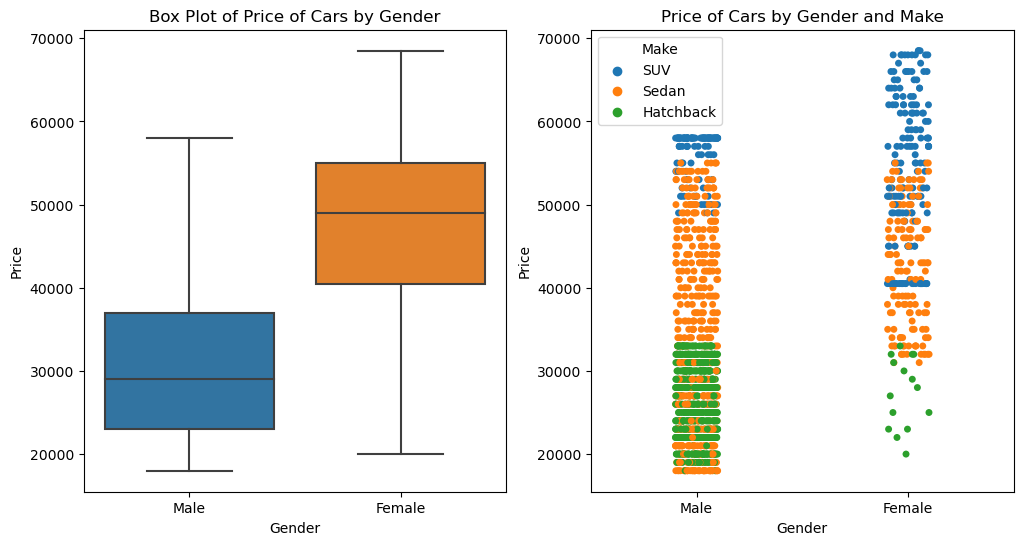

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)

sns.boxplot(data=df,x='Gender',y='Price',ax=axes[0]);
axes[0].set_title('Box Plot of Price of Cars by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Price')
sns.stripplot(data=df,x='Gender',y='Price',hue='Make',ax=axes[1]);
axes[1].set_title('Price of Cars by Gender and Make')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Price')

plt.show()

In [70]:
df.groupby('Gender')['Price'].describe().T

Gender,Female,Male
count,329.000000,1252.000000
mean,48127.659574,32111.821086
std,10793.324255,11614.317119
min,20000.000000,18000.000000
25%,40500.000000,23000.000000
50%,49000.000000,29000.000000
75%,55000.000000,37000.000000
max,68500.000000,58000.000000


 On average, females spend more on purchasing automobiles compared to males.
 
Spending distribution for females is shifted towards higher values compared to males, they prefer to buy costlier car makes like SUV and Sedan while the Male population spends money on Hatchbacks.

5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

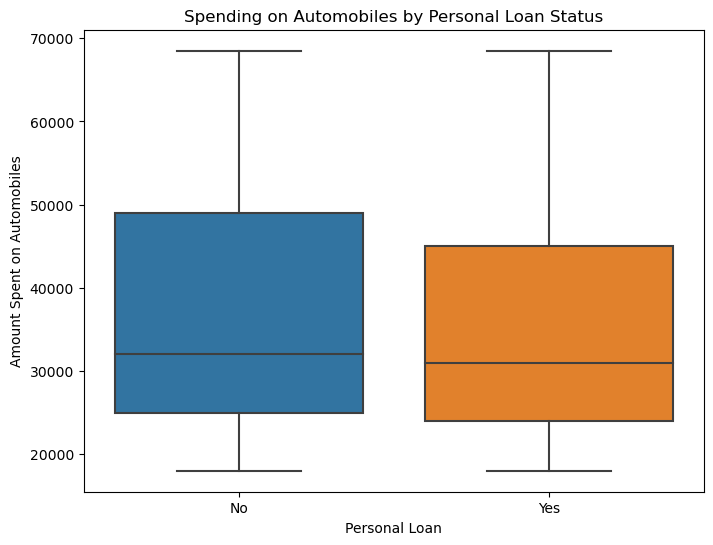

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_loan', y='Price', data=df)
plt.title('Spending on Automobiles by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Amount Spent on Automobiles')
plt.show()

In [72]:
personal_loan_yes = df[df['Personal_loan'] == 'Yes']
personal_loan_no = df[df['Personal_loan'] == 'No']

In [73]:
print('Total amt of money spent by individuals who took personal loan:',personal_loan_yes['Price'].sum())
print("Total amt of money spent by individuals who didn't took personal loan:",personal_loan_no['Price'].sum())
print('difference of amt of money spent by individuals based on personal loan:',personal_loan_no['Price'].sum()-personal_loan_yes['Price'].sum())

Total amt of money spent by individuals who took personal loan: 27259500
Total amt of money spent by individuals who didn't took personal loan: 28778500
difference of amt of money spent by individuals based on personal loan: 1519000


In [74]:
pd.crosstab(d_male['Personal_loan'], d_male['Make'], margins=True, normalize = False)

Make,Hatchback,SUV,Sedan,All
Personal_loan,,,,
No,281,80,248,609
Yes,286,44,313,643
All,567,124,561,1252


Customers who didnt take take a personal loan spend more money to buy an automobile($2,87,78,500) compared to customers who took a personal loan($2,72,59,500).

On a total customers with personal loan brought automobiles worth $2,72,59,500.


6. How does having a working partner influence the purchase of higher-priced cars?

In [75]:
df_married = df[(df['Marital_status'] == 'Married') & (df['Make'].isin(['SUV', 'Sedan']))] #DataFrame for married couples with the car make limited to Sedan and SUV

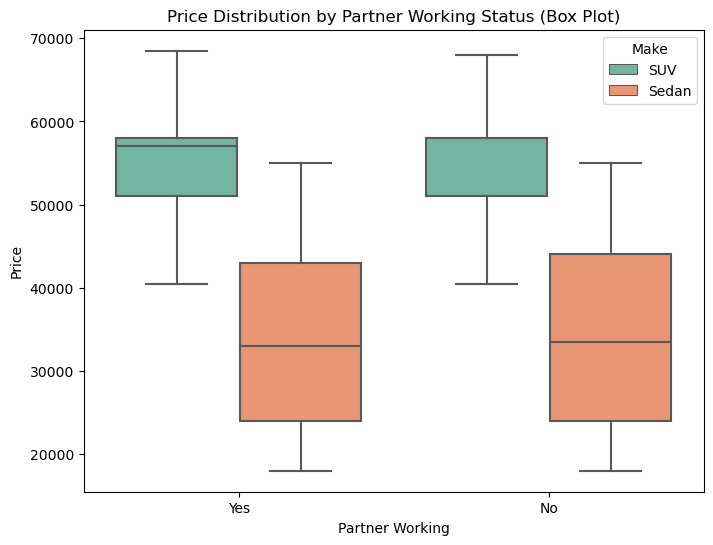

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_married, x='Partner_working', y='Price',hue='Make',palette='Set2')
plt.title('Price Distribution by Partner Working Status (Box Plot)')
plt.xlabel('Partner Working')
plt.ylabel('Price')
plt.show()


In [77]:
df_married.groupby('Partner_working')['Make'].describe()

,count,unique,top,freq
Partner_working,,,,
No,378,2,Sedan,250
Yes,567,2,Sedan,414


In [78]:
pd.crosstab(df_married['Make'], df_married['Partner_working'],values=df_married['Price'],aggfunc='sum',margins=True, normalize = False)

Partner_working,No,Yes,All
Make,,,
SUV,7036000,8407000,15443000
Sedan,8613000,14110000,22723000
All,15649000,22517000,38166000


In [79]:
pd.crosstab(df_married['Make'], df_married['Partner_working'],values=df_married['Price'],aggfunc='count',margins=True, normalize = False)

Partner_working,No,Yes,All
Make,,,
SUV,128,153,281
Sedan,250,414,664
All,378,567,945


Individuals with a working partner tend to spend more on car purchases compared to those with a non-working partner. 

SUVs has a higher average price value compared to Sedan, more than half of SUV sales among married couple was brought by customers with a working partner.

Additionally, Sedans seem to be more popular among individuals with a working partner, as evidenced by the higher expenditure on Sedans when the partner is working compared to when they are not.